In [1]:
### Analyzing gene expression data from RNA-seq data from https://archive-beta.ics.uci.edu/ml/datasets/gene+expression+cancer+rna+seq

### This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients
### having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD.

In [2]:
! pip install pandas numpy

In [3]:
### load dataset

import os
import tarfile
import pandas as pd

def load_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path, compression='gzip', header=0, sep=',', quotechar='"', on_bad_lines='skip', low_memory=False)

    return df

In [4]:
path_to_gz: str = os.path.join(os.getcwd(), "data/TCGA-PANCAN-HiSeq-801x20531.tar.gz")
data = load_data(path_to_gz)

print(data.head())

  TCGA-PANCAN-HiSeq-801x20531/ gene_0    gene_1    gene_2    gene_3  \
0                     sample_0    0.0  2.017209  3.265527  5.478487   
1                     sample_1    0.0  0.592732  1.588421  7.586157   
2                     sample_2    0.0  3.511759  4.327199  6.881787   
3                     sample_3    0.0  3.663618  4.507649  6.659068   
4                     sample_4    0.0  2.655741  2.821547  6.539454   

      gene_4  gene_5    gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  \
0  10.431999     0.0  7.175175  0.591871     0.0  ...    4.926711    8.210257   
1   9.623011     0.0  6.816049  0.000000     0.0  ...    4.593372    7.323865   
2   9.870730     0.0  6.972130  0.452595     0.0  ...    5.125213    8.127123   
3  10.196184     0.0  7.843375  0.434882     0.0  ...    6.076566    8.792959   
4   9.738265     0.0  6.566967  0.360982     0.0  ...    5.996032    8.891425   

   gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
0    9.72

In [5]:
seed: int = 1042

In [6]:
train_idx = data.index[data.isnull().any(1)]
nans = data.loc[train_idx]

data = data.drop(train_idx)
print(data.head())
print(data.shape)

  TCGA-PANCAN-HiSeq-801x20531/ gene_0    gene_1    gene_2    gene_3  \
0                     sample_0    0.0  2.017209  3.265527  5.478487   
1                     sample_1    0.0  0.592732  1.588421  7.586157   
2                     sample_2    0.0  3.511759  4.327199  6.881787   
3                     sample_3    0.0  3.663618  4.507649  6.659068   
4                     sample_4    0.0  2.655741  2.821547  6.539454   

      gene_4  gene_5    gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  \
0  10.431999     0.0  7.175175  0.591871     0.0  ...    4.926711    8.210257   
1   9.623011     0.0  6.816049  0.000000     0.0  ...    4.593372    7.323865   
2   9.870730     0.0  6.972130  0.452595     0.0  ...    5.125213    8.127123   
3  10.196184     0.0  7.843375  0.434882     0.0  ...    6.076566    8.792959   
4   9.738265     0.0  6.566967  0.360982     0.0  ...    5.996032    8.891425   

   gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
0    9.72

In [7]:

from typing import List
from sklearn.model_selection import train_test_split

# sample_names: List[str] = data["TCGA-PANCAN-HiSeq-801x20531/"]
# cancer_types: List[str] = data["gene_0"]
# del data["gene_0"]

data["samples"] = data["TCGA-PANCAN-HiSeq-801x20531/"]
del data["TCGA-PANCAN-HiSeq-801x20531/"]

train, test = train_test_split(data, test_size=0.2, random_state=seed)

print(train.head())

    gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
346    0.0  4.199900  2.582243  6.706075  10.302936     0.0  6.419613   
168    0.0  3.683820  4.373934  6.487697   9.749732     0.0  8.313731   
723    0.0  1.069358  3.920188  5.796725   9.736196     0.0  7.867025   
218    0.0  4.466366  5.244050  6.407003   9.045315     0.0  7.854600   
287    0.0  3.805664  2.398405  7.172468  10.311078     0.0  7.987059   

       gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
346  0.000000     0.0     0.0  ...    8.868196   10.540942    7.567256   
168  1.223175     0.0     0.0  ...    8.590067   10.403300    3.842567   
723  0.000000     0.0     0.0  ...    7.755529   10.015443    4.992279   
218  0.699285     0.0     0.0  ...    8.565909   10.148731    4.876679   
287  0.354226     0.0     0.0  ...    8.695514   10.467014    8.236416   

     gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
346   10.989366   11.466535    9.9441

In [8]:
### To visualize the dataset, it would be interesting to use a use several dimensionality reduction algorithms.
### PCA has had a good track record in dimensionality reduction in the life sciences, especially when looking at differentially expressed genes

### t-SNE recently has been the proposed method when it comes to dimensionality reduction when looking at differentially expressed genes, since the relationshiop
### encountered might be linear as suggested when performing a PCA analysis

### UMAP finally has been poposed as an alternative to t-SNE ands has shown to be quite robust, and in some places solves the problem that t-SNE suffers from.


In [9]:

kernels = ["linear", "rbf", "sigmoid", "poly", "cosine"]

samples = train["samples"]

del train["samples"]

print(train.head())

    gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
346    0.0  4.199900  2.582243  6.706075  10.302936     0.0  6.419613   
168    0.0  3.683820  4.373934  6.487697   9.749732     0.0  8.313731   
723    0.0  1.069358  3.920188  5.796725   9.736196     0.0  7.867025   
218    0.0  4.466366  5.244050  6.407003   9.045315     0.0  7.854600   
287    0.0  3.805664  2.398405  7.172468  10.311078     0.0  7.987059   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
346  0.000000     0.0     0.0  ...    5.902896    8.868196   10.540942   
168  1.223175     0.0     0.0  ...    5.856548    8.590067   10.403300   
723  0.000000     0.0     0.0  ...    5.130041    7.755529   10.015443   
218  0.699285     0.0     0.0  ...    5.578256    8.565909   10.148731   
287  0.354226     0.0     0.0  ...    5.586041    8.695514   10.467014   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
346    7.567256   10.989366   11.4665

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import KernelPCA

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, train.columns.values),
    ]
)

In [11]:
for column_name, item in train.iteritems():
    train[column_name] = train[column_name].astype(float)

In [12]:
import numpy as np
from typing import Dict

losses: Dict[str, float] ={}

for kernel in kernels:
    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("pca", KernelPCA(n_components=2, kernel=kernel, fit_inverse_transform=True))]
    )

    pipe.fit(train)
    transformed_data = pipe.transform(train)

    pipe['preprocessor'].transformers[0][1].fit(train)

    reconstructed_data =  pipe['preprocessor'].transformers[0][1].inverse_transform(pipe['pca'].inverse_transform(transformed_data))

    error = np.sum((train - reconstructed_data) ** 2, axis=1).mean()

    print(f"Kernel: {kernel} - Mean Reconstruction Error: {error}")

    losses[kernel] = error

Kernel: linear - Mean Reconstruction Error: 28802.84541470443
Kernel: rbf - Mean Reconstruction Error: 26408.19192029988
Kernel: sigmoid - Mean Reconstruction Error: 30023.466627806774
Kernel: poly - Mean Reconstruction Error: 24665.042332443056
Kernel: cosine - Mean Reconstruction Error: 29502.351215034712


In [13]:

best_pca_model = min(losses, key=losses.get)

print(best_pca_model, losses[best_pca_model])

poly 24665.042332443056


In [14]:
pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("pca", KernelPCA(n_components=2, kernel="poly", fit_inverse_transform=True))]
    )

transformed_train = pipe.fit_transform(train)


In [15]:
! pip install matplotlib

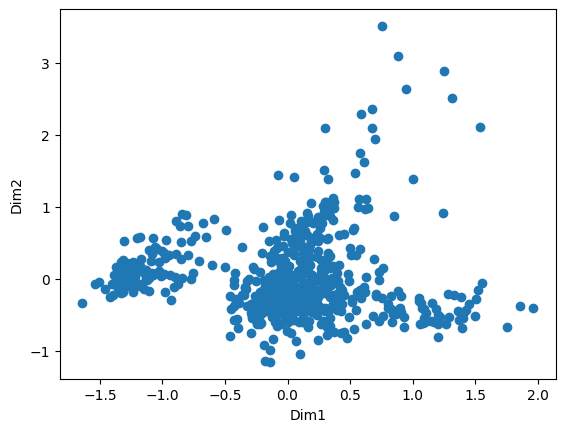

In [16]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(transformed_train[:, 0], transformed_train[:, 1])
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.show()

In [17]:

from sklearn.metrics import silhouette_score

def get_inertia(kmeans, df) -> float:
    kmeans.fit(df)
    return kmeans.inertia_

def get_silhouette(kmeans, df) -> float:
    kmeans.fit(df)

    return silhouette_score(df, kmeans.labels_, metric="euclidean", random_state=seed)

In [18]:
### We have 6 different cancer types, however I chose 21 to be the max value of k because of the posibility of subtypes

In [19]:
from sklearn.cluster import KMeans
sse: List[float] = []
scores: List[float] = []

transformed_train_df = pd.DataFrame(transformed_train, columns={"PCA1", "PCA2"})

for k in range(2, 21):
    k_means: KMeans = KMeans(n_clusters=k, random_state=seed)
    sse.append(get_inertia(k_means, transformed_train_df))
    scores.append(get_silhouette(k_means, transformed_train_df))


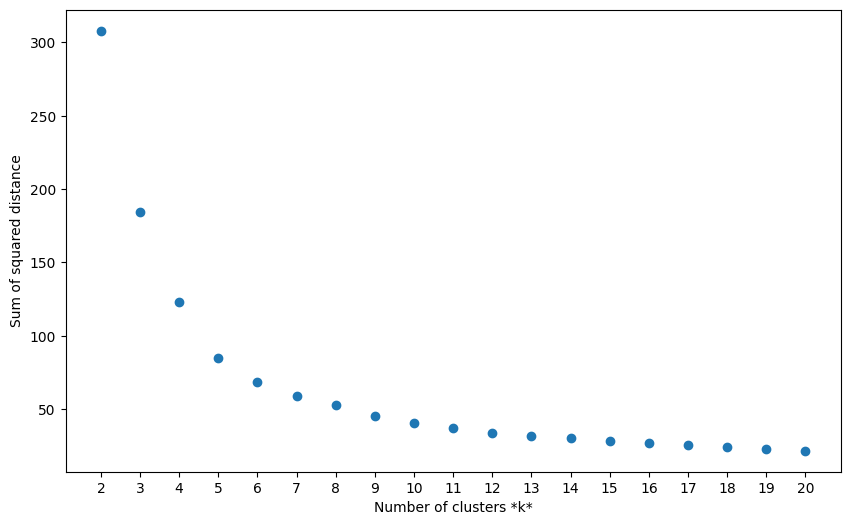

In [20]:
from matplotlib.ticker import MultipleLocator


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = list(range(2, 21)), y = sse)
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel(r'Number of clusters *k*')
plt.ylabel("Sum of squared distance")

plt.show()

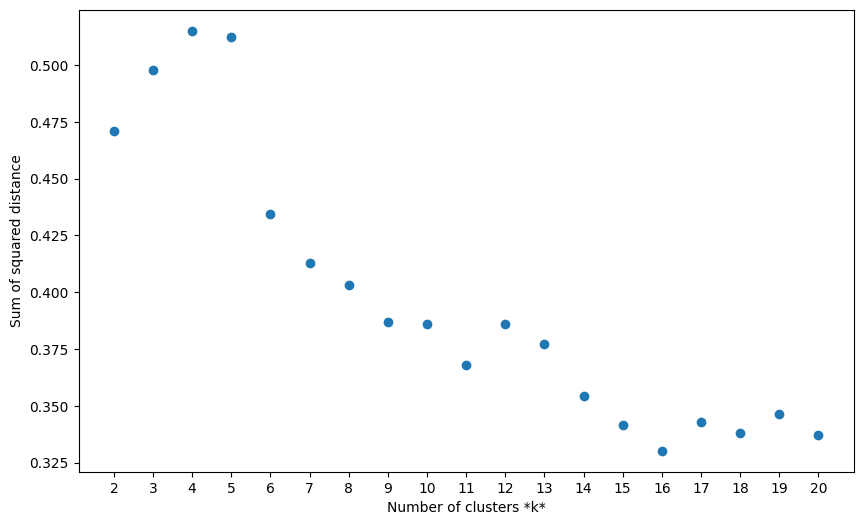

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = list(range(2, 21)), y = scores)
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel(r'Number of clusters *k*')
plt.ylabel("Sum of squared distance")

plt.show()

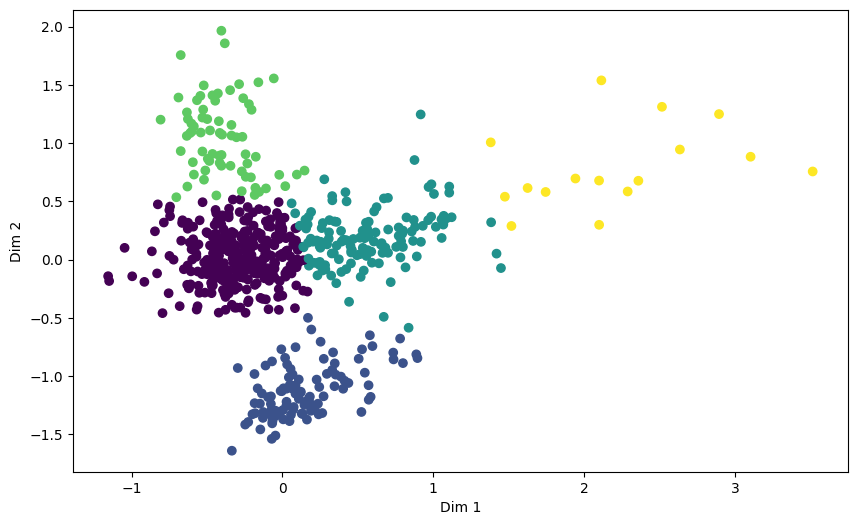

In [22]:
### Based on the k-means the ideal number of clusters is 4, since that is the best silhouette score and where the elbow begins. 
### However, based on the descitption of the dataset, we have 5 clusters. The silhouette score does not look bad either and the sse is located near the elbow
###

k_means: KMeans = KMeans(n_clusters=5, random_state=seed)
k_means.fit(transformed_train)
transformed_train_df["cluster"] = k_means.labels_


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = transformed_train_df["PCA1"], y = transformed_train_df["PCA2"], c = transformed_train_df["cluster"])
# ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.show()

In [23]:
transformed_test = pd.DataFrame(pipe.transform(test), columns=["PCA1", "PCA2"])
transformed_test["cluster"] = k_means.predict(transformed_test) ## assign label

print(transformed_test.head())


       PCA1      PCA2  cluster
0  0.089007  0.172622        2
1  0.101524  0.893160        2
2 -1.144389  0.377989        1
3  0.086822 -0.368574        0
4 -0.329992 -0.131021        0


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


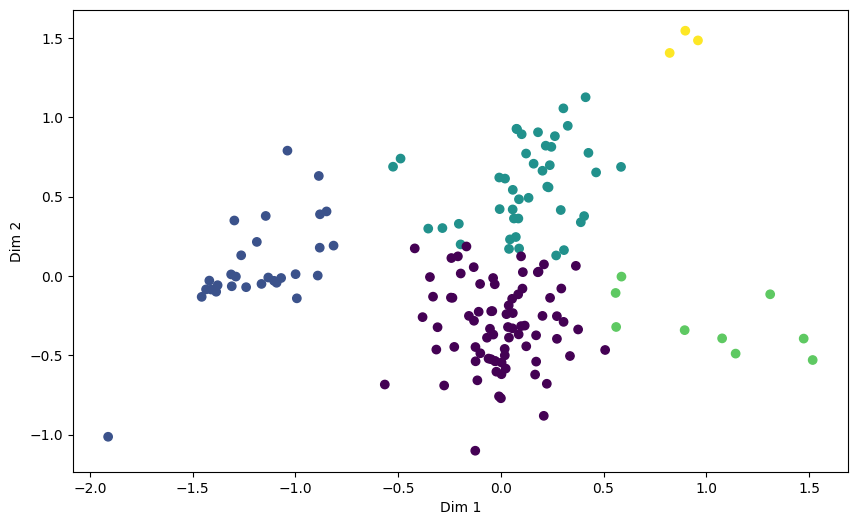

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = transformed_test["PCA1"], y = transformed_test["PCA2"], c = transformed_test["cluster"])
# ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.show()

In [25]:
### The PCA has shown to work quite well when performing the dimensionality reduction, and the clustering of the cancer
### cell types is similar between the train and test set.

### I think the model generalizes well enough to make assumptions about a given cell type.

In [26]:
### This code belongs to Leland McInnes, the developer and maintainer of the UMAP library.
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors

def trustworthiness(dataset: pd.DataFrame, embedded: pd.DataFrame, n_neighbors: int, metric: str = 'euclidean'):


        """Expresses to what extent the local structure is retained.
        The trustworthiness is within [0, 1]. It is defined as
        .. math::
            T(k) = 1 - \\frac{2}{nk (2n - 3k - 1)} \sum^n_{i=1}
                \sum_{j \in \mathcal{N}_{i}^{k}} \max(0, (r(i, j) - k))
        where for each sample i, :math:`\mathcal{N}_{i}^{k}` are its k nearest
        neighbors in the output space, and every sample j is its :math:`r(i, j)`-th
        nearest neighbor in the input space. In other words, any unexpected nearest
        neighbors in the output space are penalised in proportion to their rank in
        the input space.
        * "Neighborhood Preservation in Nonlinear Projection Methods: An
        Experimental Study"
        J. Venna, S. Kaski
        * "Learning a Parametric Embedding by Preserving Local Structure"
        L.J.P. van der Maaten
        Parameters
        ----------
        X : array, shape (n_samples, n_features) or (n_samples, n_samples)
            If the metric is 'precomputed' X must be a square distance
            matrix. Otherwise it contains a sample per row.
        X_embedded : array, shape (n_samples, n_components)
            Embedding of the training data in low-dimensional space.
        n_neighbors : int, optional (default: 5)
            Number of neighbors k that will be considered.
        metric : string, or callable, optional, default 'euclidean'
            Which metric to use for computing pairwise distances between samples
            from the original input space. If metric is 'precomputed', X must be a
            matrix of pairwise distances or squared distances. Otherwise, see the
            documentation of argument metric in sklearn.pairwise.pairwise_distances
            for a list of available metrics.
        Returns
        -------
        trustworthiness : float
            Trustworthiness of the low-dimensional embedding.
        """
        dist_X = pairwise_distances(dataset, metric=metric)
        if metric == 'precomputed':
            dist_X = dist_X.copy()
        # we set the diagonal to np.inf to exclude the points themselves from
        # their own neighborhood
        np.fill_diagonal(dist_X, np.inf)
        ind_X = np.argsort(dist_X, axis=1)
        # `ind_X[i]` is the index of sorted distances between i and other samples
        ind_X_embedded = NearestNeighbors(n_neighbors=n_neighbors).fit(embedded).kneighbors(
            return_distance=False)

        # We build an inverted index of neighbors in the input space: For sample i,
        # we define `inverted_index[i]` as the inverted index of sorted distances:
        # inverted_index[i][ind_X[i]] = np.arange(1, n_sample + 1)
        n_samples = dataset.shape[0]
        inverted_index = np.zeros((n_samples, n_samples), dtype=int)
        ordered_indices = np.arange(n_samples + 1)
        inverted_index[ordered_indices[:-1, np.newaxis],
                    ind_X] = ordered_indices[1:]
        ranks = inverted_index[ordered_indices[:-1, np.newaxis],
                            ind_X_embedded] - n_neighbors
        t = np.sum(ranks[ranks > 0])
        t = 1.0 - t * (2.0 / (n_samples * n_neighbors *
                            (2.0 * n_samples - 3.0 * n_neighbors - 1.0)))
        return t


In [27]:

## This optimization step takes a while.


from itertools import product
from sklearn.manifold import TSNE

tsne_data = data.drop("samples" ,axis= 1)

perplexities: List[int] = [x for x in range(5, 100, 5)]
metrics: List[str] = ["euclidean", "manhattan", "chebyshev"]
trust_score: Dict[int, float] = {}

for perplexity, metric in product(perplexities, metrics):

    pipe_tsne = Pipeline(
            steps=[("preprocessor", preprocessor), ("tsne", TSNE(n_components=2, perplexity=perplexity, metric=metric, random_state=seed))]
        )

    transformed_data = pipe_tsne.fit_transform(tsne_data)
    trust_score[f"{perplexity}-{metric}"] = trustworthiness(tsne_data, transformed_data, perplexity, metric)

best_tsne_model = max(trust_score, key=trust_score.get)
print(best_tsne_model, trust_score[best_tsne_model])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.p

75-euclidean 0.9692674128269895


In [28]:
### A big problem of t-SNE is that it does not provide a predict/transform function making it not ideal to be used in a predictive pipeline

pipe_tsne = Pipeline(
        steps=[("preprocessor", preprocessor), ("tsne", TSNE(n_components=2, perplexity=75, metric="euclidean", random_state=seed))]
    )

tsne_transformed_train = pipe_tsne.fit_transform(train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


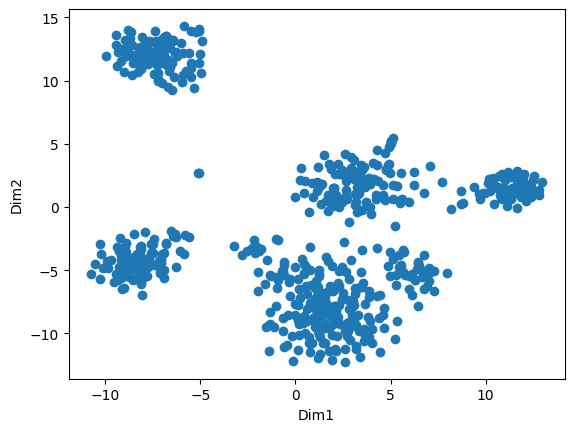

In [29]:
plt.scatter(tsne_transformed_train[:, 0], tsne_transformed_train[:, 1])
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.show()

In [30]:
tsne_sse: List[float] = []
tsne_scores: List[float] = []

tsne_transformed_train_df = pd.DataFrame(tsne_transformed_train, columns={"TSNE1", "TSNE2"})

for k in range(2, 21):
    k_means: KMeans = KMeans(n_clusters=k, random_state=seed)
    tsne_sse.append(get_inertia(k_means, tsne_transformed_train_df))
    tsne_scores.append(get_silhouette(k_means, tsne_transformed_train_df))

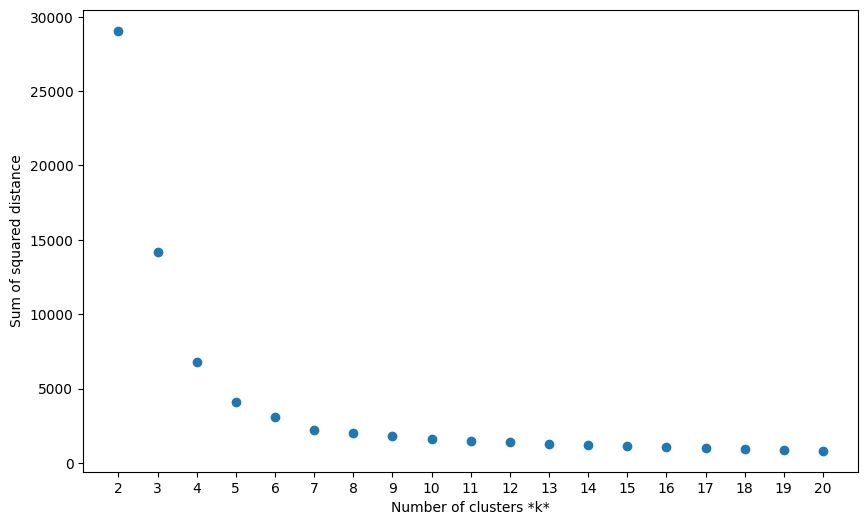

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = list(range(2, 21)), y = tsne_sse)
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel(r'Number of clusters *k*')
plt.ylabel("Sum of squared distance")

plt.show()

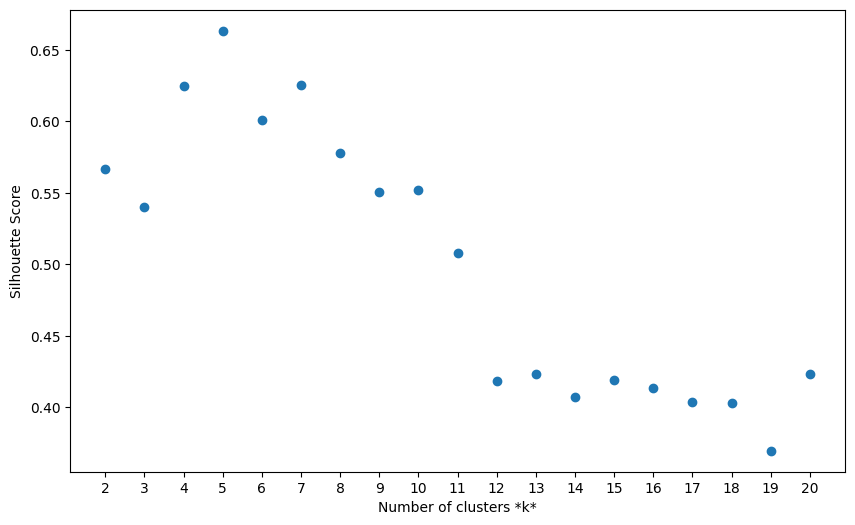

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = list(range(2, 21)), y = tsne_scores)
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel(r'Number of clusters *k*')
plt.ylabel("Silhouette Score")

plt.show()

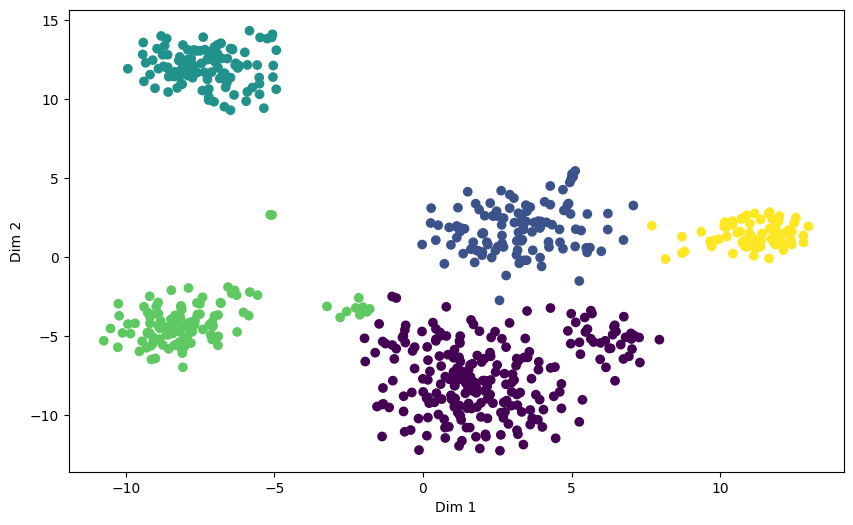

In [33]:
### We have more refined clusters here even though the silhoutte score is not still very close to one.
### We can still observe 5 distinct clusters, which has the best silhouette score
### This suggests that t-SNE models the dataset better than a PCA would

k_means: KMeans = KMeans(n_clusters=5, random_state=seed)
k_means.fit(tsne_transformed_train_df)
tsne_transformed_train_df["cluster"] = k_means.labels_


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = tsne_transformed_train_df["TSNE1"], y = tsne_transformed_train_df["TSNE2"], c = tsne_transformed_train_df["cluster"])
# ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.show()

In [34]:
### A common misconception when  with nonlinear dimensional reduction techniques is:
### The distance between clusters. (IT DOES NOT HAVE ANY MEANING!)
### What we can conclude from this t-SNE analysis is that points in close together have a high probability
### of being close to each other in higher dimensions and vice versa.

In [35]:

### UMAP has been said to maintain both the global and local structure of the dataset after dimensionality reduction.
### Making it more robust that t-SNE. Furthemore, since it is a non-linear algorithm, it can capture relationships
### that linear models like PCA cannot.

In [36]:
# from umap import UMAP
neighbors: List[int] = [x for x in range(5, 100, 5)]
distances: List[int] = [x/10 for x in range(1, 11)]
in_metric: List[str] = ['euclidean', 'manhattan', 'chebyshev']
out_metric: List[str] = ['euclidean', 'manhattan', 'chebyshev']

lists = [neighbors, distances, in_metric, out_metric]

for combination in product(*lists):
    print(combination)

(5, 0.1, 'euclidean', 'euclidean')
(5, 0.1, 'euclidean', 'manhattan')
(5, 0.1, 'euclidean', 'chebyshev')
(5, 0.1, 'manhattan', 'euclidean')
(5, 0.1, 'manhattan', 'manhattan')
(5, 0.1, 'manhattan', 'chebyshev')
(5, 0.1, 'chebyshev', 'euclidean')
(5, 0.1, 'chebyshev', 'manhattan')
(5, 0.1, 'chebyshev', 'chebyshev')
(5, 0.2, 'euclidean', 'euclidean')
(5, 0.2, 'euclidean', 'manhattan')
(5, 0.2, 'euclidean', 'chebyshev')
(5, 0.2, 'manhattan', 'euclidean')
(5, 0.2, 'manhattan', 'manhattan')
(5, 0.2, 'manhattan', 'chebyshev')
(5, 0.2, 'chebyshev', 'euclidean')
(5, 0.2, 'chebyshev', 'manhattan')
(5, 0.2, 'chebyshev', 'chebyshev')
(5, 0.3, 'euclidean', 'euclidean')
(5, 0.3, 'euclidean', 'manhattan')
(5, 0.3, 'euclidean', 'chebyshev')
(5, 0.3, 'manhattan', 'euclidean')
(5, 0.3, 'manhattan', 'manhattan')
(5, 0.3, 'manhattan', 'chebyshev')
(5, 0.3, 'chebyshev', 'euclidean')
(5, 0.3, 'chebyshev', 'manhattan')
(5, 0.3, 'chebyshev', 'chebyshev')
(5, 0.4, 'euclidean', 'euclidean')
(5, 0.4, 'euclidean'

In [ ]:
### For some reason, there seems to be a problem when installing umap-learn in Python 3.10
### Using the above combination of variables, optimize UMAP.
### The evaluation of the UMAP model would be performed similarly to that as t-SNE i.e. by calculating the trusworthiness score.

In [ ]:
### Conclusion:

### 1. We know a priori that the data set comprised of 5 different cancer types
### 2. Dimensionality reduction allows us to visualize high dimensional data, producing a new set of variables in lower dimensions (2-dim or 3-dim)
### 3. By projecting the data into 2 dimensions, we observed 5 distinct clusters which were validated using k-Means
### 4. t-SNE formed more distinct clusters than the KernelPCA. This can attributed to the fact that PCAs try to maximize variance within the data set
###     when projecting to a lower dimensional space. However, the dataset might not be defined in a linear space. On the other hand, t-SNE is a nonlinear
###     dimensional reduction algorithm, hence can model more complex functions than UMAP can. This would explain the better representation of the data set
###     in 2 dimensions.
### 5. The five clusters observed after dimensionality reduction and clustering, can be attributed to the differentially expressed genes within the cells.
###    This is because, difference cell types express different genes, but also the expression of some genes might would vary accross different cells. Hence,
####   the differential expression of these genes allow for the catagorization of different cell types and by proxy of different cancer types, as different
###    cancer types would have different biomarkers (biochemical profiles).